# Design of a Bessel low-pass filter
In this exercice (used as homework 3, fall semester 2019) we had given a sampling period of $h=0.04$, and we want to design a second-order Bessel filter with an attenuation of $\beta = 0.02$ at the Nyquist frequency $\omega_N = \frac{\pi}{h} = 25\pi.$

The transfer function of a Bessel low-pass filter is given by 
$$ H(s) = \frac{3}{(\frac{s}{\omega_0})^2 + 3(\frac{s}{\omega_0}) + 3}, $$
and has a single parameter, the frequency parameter $\omega_0$. Note that at the frequency $s=i\omega_0$, the gain of the filter is 
$$ |H(i\omega_0)| = \frac{3}{| (i)^2 + 3i + 3|} = \frac{3}{|2 + 3i|} = \frac{3}{sqrt{13}} \approx 0.832 > -3\text{dB}, $$
so the frequency $\omega_0$ is close to, but below the actual cutoff-frequency of the Bessel filter.

In order to solve the problem we set up the equation 
$$ |H(i\omega_N)| = \frac{3}{|(\frac{i\omega_N}{\omega_0})^2 + 3(\frac{i\omega_N}{\omega_0}) + 3|} = 0.02.$$
It will be convenient to introduce the change of variable $$ x = (\frac{\omega_N}{\omega_0})^2,$$ and obtain the equation
$$ \frac{3}{| -x + i3\sqrt{x} + 3|} = \frac{3}{\sqrt{(3-x)^2 + 9x}} = 0.02,$$
which will be satisfied for 
$$ (3-x)^2 + 9x = (\frac{3}{0.02})^2, \quad \text{or}$$
$$ x^2 +3x + 9-22500 = 0, $$
with solution
$$ x = - \frac{3}{2} \pm \frac{1}{2}\sqrt{9 + 4\cdot22491} \approx \begin{cases} 148.48\\ -151.48 \end{cases}.$$
Only the positive solution is meaningful, so we get
$$ x = (\frac{\omega_N}{\omega_0})^2 = 148.48, \quad \text{or}$$
$$ \omega_0 = \frac{\omega_N}{\sqrt{148.48}} = \frac{25\pi}{\sqrt{148.48}} = 6.45. $$

In [18]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as cm

In [24]:
# Verify by calculating the gain of the designed filter at the Nyquist frequency
h = 0.04
wN = np.pi/h
a = 1; b=3; c=9-(3.0/0.02)**2
x = (-b + np.sqrt(b**2 - 4*c))/(2*a) # The usual formula
print("x = (wN/w0)^2 = %f" %x)
w0 = wN / np.sqrt(x)
print("w0 = wN/sqrt(x) = %f" %w0)
H = cm.tf([3], [(1/w0)**2, 3*(1/w0), 3])
print("|H(iwN)| = %f" % np.abs(cm.evalfr(H, 1j*wN)))

x = (wN/w0)^2 = 148.477498
w0 = wN/sqrt(x) = 6.445544
|H(iwN)| = 0.020000


<IPython.core.display.Javascript object>


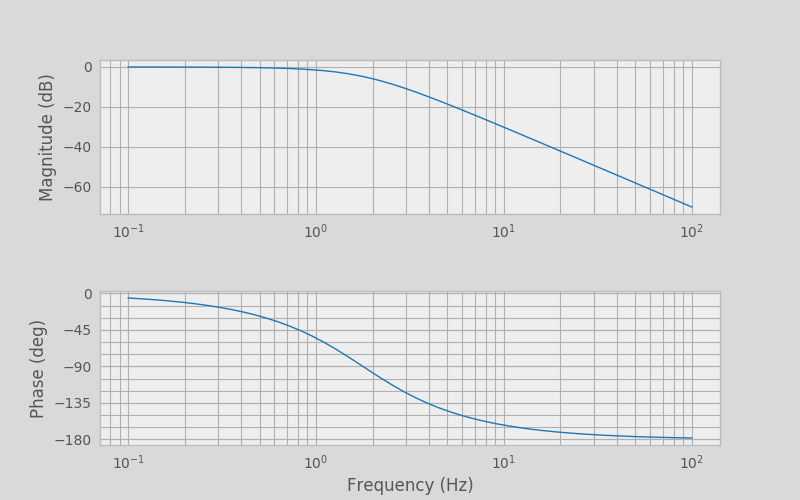

In [31]:
# Now the Bode diagram
plt.figure(figsize=(8,5))
(mag, ph, W) = cm.bode(H)

In [12]:
b = 3
c = -22491
-b/2 - np.sqrt(b**2 - 4*c)

-301.45499662449367

In [13]:
np.pi*25/np.sqrt(298.45)

4.5462581200244134

0.187688665329


<IPython.core.display.Javascript object>


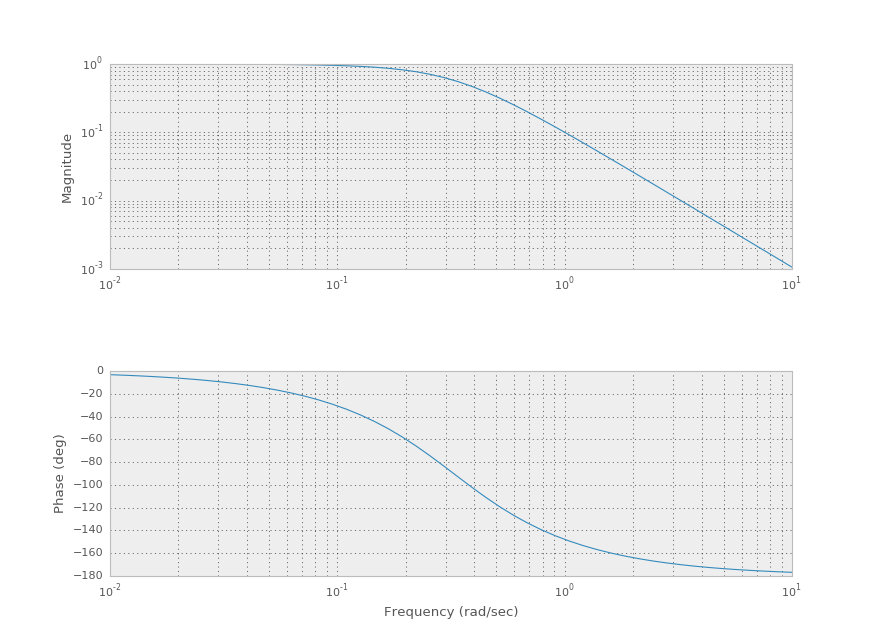

In [2]:
wn = 1
w0 = np.sqrt( 2.0/(-3+np.sqrt(9 + 4*(30**2-9))) )
print w0
H = cm.tf([3], [1/w0**2, 3/w0, 3])

(mag, ph, W) = cm.bode(H)

<IPython.core.display.Javascript object>


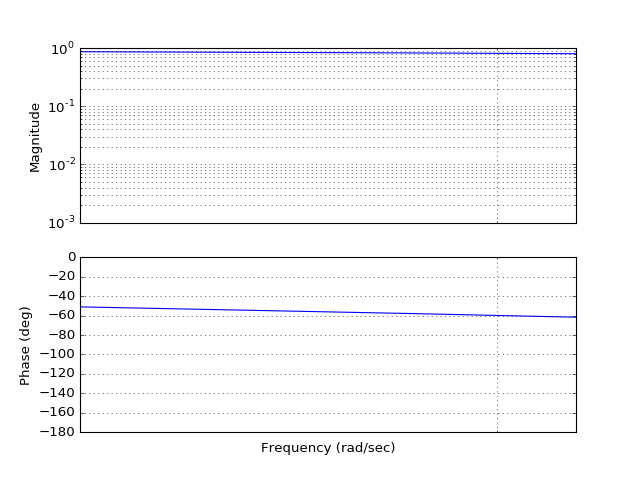

In [15]:
plt.figure()
(mag, ph, W) = cm.bode(H)

In [16]:
axs = plt.gcf().get_axes()
axs[0].set_xlim(0.9*w0, 1.1*w0)
#axs[0].set_ylim(0.08, 0.2)
axs[1].set_xlim(0.9*w0, 1.1*w0)
#axs[1].set_ylim(-160, -140)


(0.16891979879585922, 0.20645753186160573)

In [18]:
np.sqrt(3)

1.7320508075688772